In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
airline_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\1989.csv.bz2')
airline_data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1989,1,23,1,1419.000,1230,1742.000,1552,UA,183,...,nan,nan,0,nan,0,nan,nan,nan,nan,nan
1,1989,1,24,2,1255.000,1230,1612.000,1552,UA,183,...,nan,nan,0,nan,0,nan,nan,nan,nan,nan
2,1989,1,25,3,1230.000,1230,1533.000,1552,UA,183,...,nan,nan,0,nan,0,nan,nan,nan,nan,nan
3,1989,1,26,4,1230.000,1230,1523.000,1552,UA,183,...,nan,nan,0,nan,0,nan,nan,nan,nan,nan
4,1989,1,27,5,1232.000,1230,1513.000,1552,UA,183,...,nan,nan,0,nan,0,nan,nan,nan,nan,nan


In [3]:
airline_data.shape

(5041200, 29)

In [4]:
airline_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,5041200.000,5041200.000,5041200.000,5041200.000,4967035.000,5041200.000,4952196.000,5041200.000,5041200.000,0.000,...,0.000,0.000,5041200.000,0.000,5041200.000,0.000,0.000,0.000,0.000,0.000
mean,1989.000,6.519,15.708,3.957,1364.867,1356.045,1497.378,1496.717,773.889,nan,...,nan,nan,0.015,nan,0.003,nan,nan,nan,nan,nan
std,0.000,3.469,8.782,1.993,478.129,471.424,497.331,485.221,582.273,nan,...,nan,nan,0.120,nan,0.054,nan,nan,nan,nan,nan
min,1989.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,nan,...,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan
25%,1989.000,3.000,8.000,2.000,943.000,935.000,1119.000,1118.000,325.000,nan,...,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan
50%,1989.000,7.000,16.000,4.000,1341.000,1335.000,1523.000,1521.000,640.000,nan,...,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan
75%,1989.000,10.000,23.000,6.000,1750.000,1743.000,1921.000,1916.000,1103.000,nan,...,nan,nan,0.000,nan,0.000,nan,nan,nan,nan,nan
max,1989.000,12.000,31.000,7.000,2400.000,2400.000,2400.000,2400.000,9368.000,nan,...,nan,nan,1.000,nan,1.000,nan,nan,nan,nan,nan


In [5]:
airline_data.isnull().values.any()

True

In [6]:
# Count nulls 
null_count = airline_data.isnull().sum()
null_count[null_count>0]

DepTime                74165
ArrTime                89004
TailNum              5041200
ActualElapsedTime      89004
AirTime              5041200
ArrDelay               89004
DepDelay               74165
Distance               26988
TaxiIn               5041200
TaxiOut              5041200
CancellationCode     5041200
CarrierDelay         5041200
WeatherDelay         5041200
NASDelay             5041200
SecurityDelay        5041200
LateAircraftDelay    5041200
dtype: int64

In [7]:
#Removing the columns that only contain NaN values

airline_data = airline_data.dropna(thresh=len(airline_data) - 5031199, axis=1)

In [8]:
airline_data['ArrDelay'].mean()

8.406395667699744

In [9]:
#Drop NA values from the Delayed Arrivals
airline_data = airline_data.dropna(subset=['ArrDelay'], how='all')

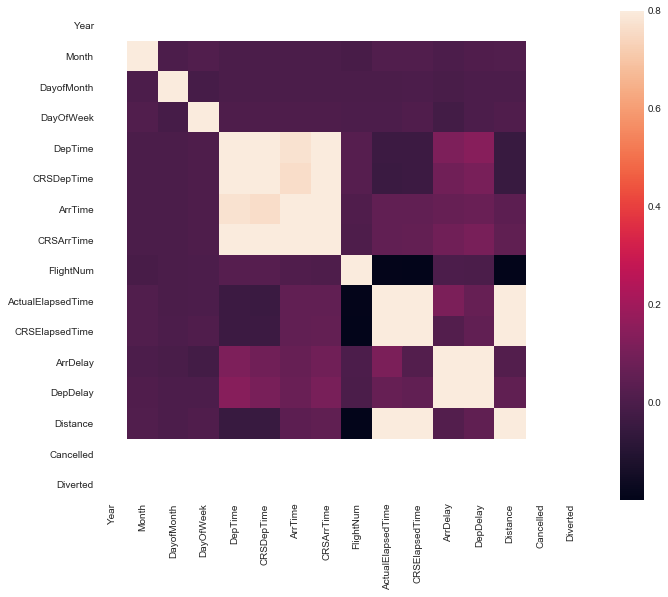

In [11]:
corrmat = airline_data.corr()

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There are multiple columns with null values

In [12]:
#Turn the Arrival Delay column to binary based on if the arrival was more than 30 minutes late.
#1 means the flight was delayed 30+ minutes

airline_data['ArrDelay'] = np.where(airline_data['ArrDelay'] >= 30 , 1, 0)

In [13]:
airline_data['ArrDelay'].mean()

0.10413642755658298

In [14]:
airline_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted
count,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4952196.000,4925482.000,4952196.000,4952196.000
mean,1989.000,6.533,15.733,3.954,1364.882,1356.205,1497.378,1497.028,774.077,107.476,107.095,0.104,8.057,618.957,0.000,0.000
std,0.000,3.462,8.783,1.993,477.846,471.157,497.331,484.891,582.232,63.654,63.247,0.305,22.396,513.844,0.000,0.000
min,1989.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,-591.000,-60.000,0.000,-662.000,0.000,0.000,0.000
25%,1989.000,4.000,8.000,2.000,943.000,936.000,1119.000,1118.000,325.000,63.000,63.000,0.000,0.000,258.000,0.000,0.000
50%,1989.000,7.000,16.000,4.000,1341.000,1335.000,1523.000,1521.000,640.000,88.000,87.000,0.000,0.000,447.000,0.000,0.000
75%,1989.000,10.000,23.000,6.000,1750.000,1742.000,1921.000,1916.000,1103.000,136.000,136.000,0.000,8.000,842.000,0.000,0.000
max,1989.000,12.000,31.000,7.000,2400.000,2400.000,2400.000,2400.000,9300.000,1494.000,1495.000,1.000,1439.000,4502.000,0.000,0.000


In [15]:
airline_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'Cancelled', 'Diverted'],
      dtype='object')

In [16]:

X = airline_data[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime','DepDelay', 'Origin',
       'Dest', 'Distance', 'Cancelled', 'Diverted']]
y = airline_data['ArrDelay']

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier(
    n_estimators=15,
    criterion='entropy',
    max_features=3,
    max_depth=9
)


rfc.fit(X, y)
y_1_predictions = rfc.predict(X)


print("\nAccuracy of training set: {:.3f}".format(rfc.score(X, y)))
print("\nAccuracy of test set: {:.3f}".format(rfc.score(X, y)))
